In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Task 1: Exploratory Data Analysis (EDA)

In [ ]:
titanic_df = pd.read_csv('/content/Titanic_train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


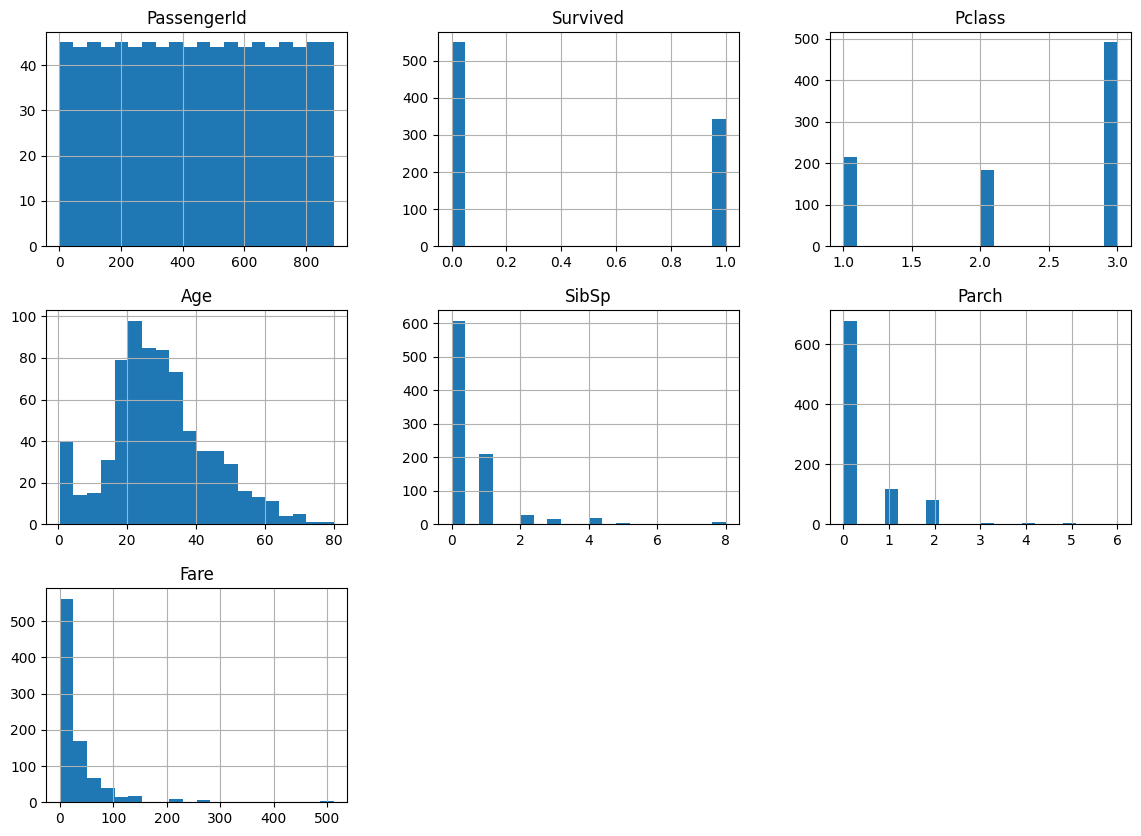

In [ ]:
# Plot histograms for numerical features
titanic_df.hist(bins=20, figsize=(14, 10))
plt.show()

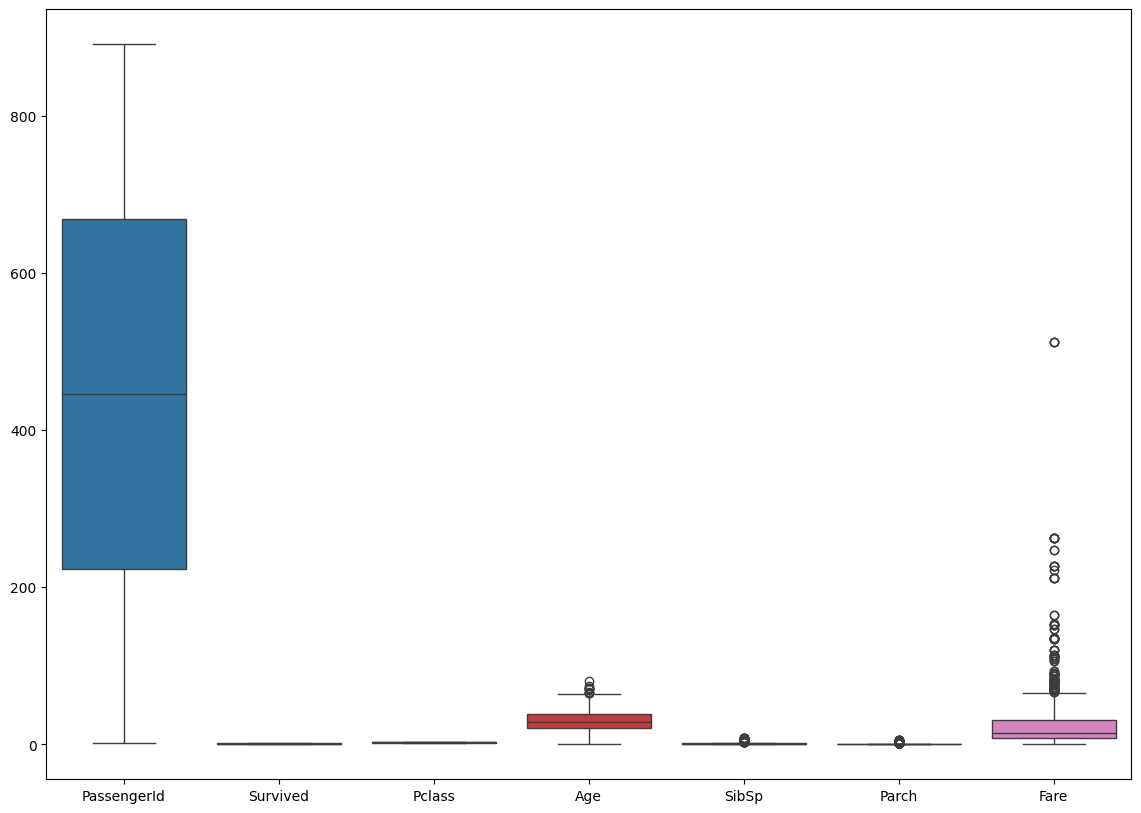

In [ ]:
# Plot box plots for numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=titanic_df.select_dtypes(include=['float64', 'int64']))
plt.show()

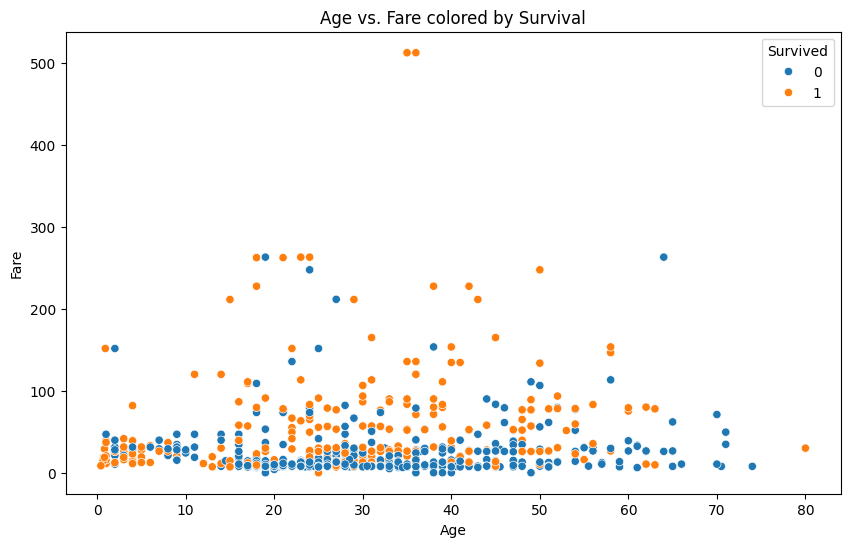

In [ ]:
# Scatter plot for Age vs. Fare, colored by survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Age vs. Fare colored by Survival')
plt.show()

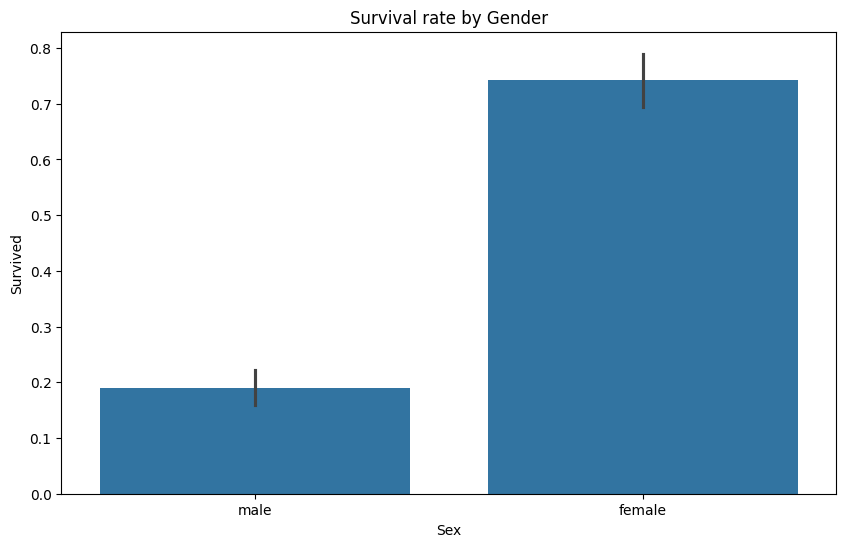

In [ ]:
# Bar plot for categorical features like Sex and Survived
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival rate by Gender')
plt.show()

Task 2: Data Preprocessing

In [ ]:
# Impute missing values for Age using the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Impute missing values for Embarked using the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

In [ ]:
# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Drop irrelevant columns
titanic_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [ ]:
# Display the first few rows of the preprocessed dataset
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


Task 3: Building Predictive Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Split the dataset into features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
lgb_metrics = evaluate_model(y_test, lgb_pred)
xgb_metrics = evaluate_model(y_test, xgb_pred)

In [ ]:
print("LightGBM Performance:\nAccuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*lgb_metrics))
print("XGBoost Performance:\nAccuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*xgb_metrics))

LightGBM Performance:
Accuracy: 0.8324, Precision: 0.8056, Recall: 0.7838, F1 Score: 0.7945
XGBoost Performance:
Accuracy: 0.8212, Precision: 0.7917, Recall: 0.7703, F1 Score: 0.7808


Task 4: Comparative Analysis

In [ ]:
# Comparative Analysis
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': lgb_metrics,
    'XGBoost': xgb_metrics
})

In [ ]:
performance_df

,Metric,LightGBM,XGBoost
0,Accuracy,0.832402,0.821229
1,Precision,0.805556,0.791667
2,Recall,0.783784,0.770270
3,F1 Score,0.794521,0.780822


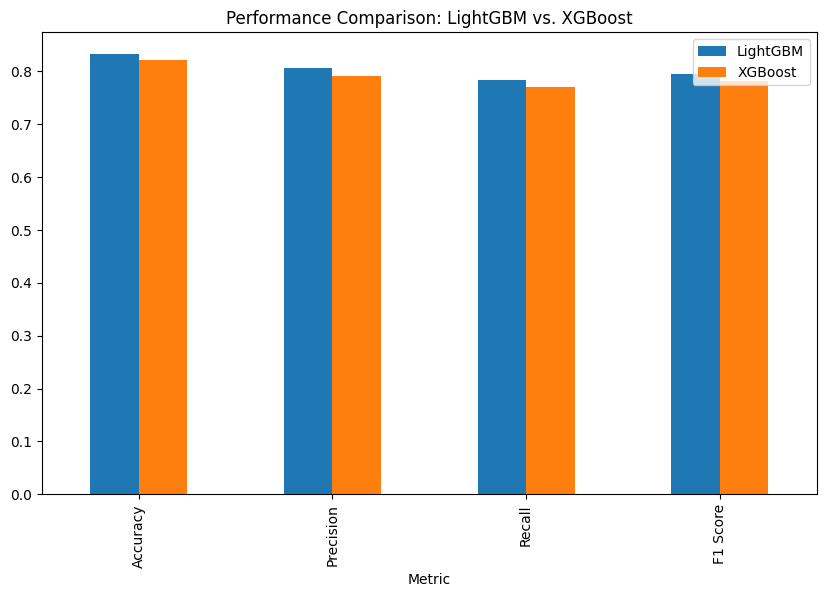

In [ ]:
# Visualize the comparison
performance_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison: LightGBM vs. XGBoost')
plt.show()